In [29]:
!pip install prophet plotly notebook ipywidgets

1759.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv("data/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [2]:
m = Prophet()
m.fit(df)

16:57:08 - cmdstanpy - INFO - Chain [1] start processing
16:57:08 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
future = m.make_future_dataframe(periods=365)
print(f"rows: {future.shape[0]}")
future.tail(10)

rows: 3270


,ds
3260,2017-01-10
3261,2017-01-11
3262,2017-01-12
3263,2017-01-13
3264,2017-01-14
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [4]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204239,7.477835,8.920259
3266,2017-01-16,8.529231,7.824848,9.269525
3267,2017-01-17,8.316611,7.635770,9.006115
3268,2017-01-18,8.149244,7.436831,8.888106
3269,2017-01-19,8.161142,7.452232,8.963420


/Users/wangjian/workspace/nnsay/sagemaker-tutorial/env/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/wangjian/workspace/nnsay/sagemaker-tutorial/env/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


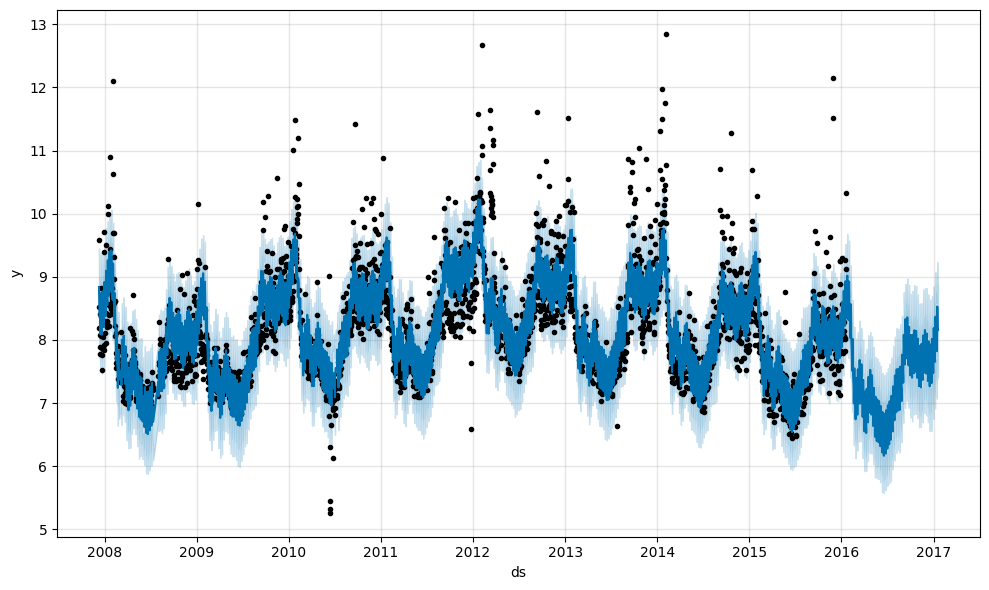

In [34]:
fig1 = m.plot(forecast)

/Users/wangjian/workspace/nnsay/sagemaker-tutorial/env/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/wangjian/workspace/nnsay/sagemaker-tutorial/env/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/wangjian/workspace/nnsay/sagemaker-tutorial/env/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future versi

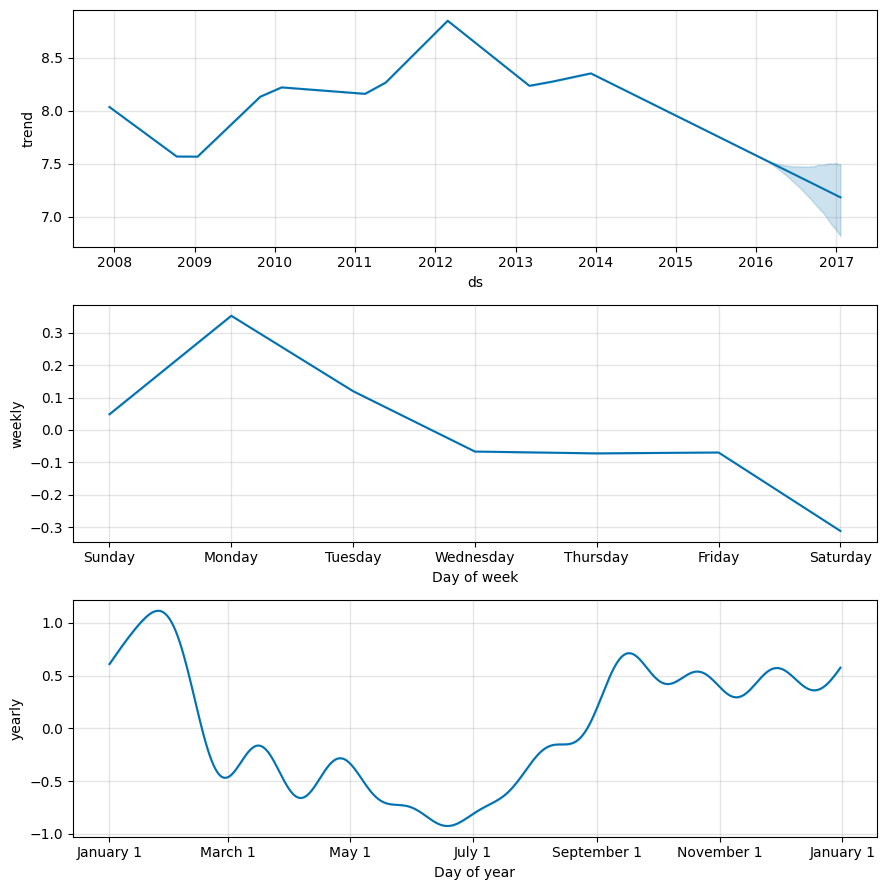

In [35]:
fig2 = m.plot_components(forecast)

In [6]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [7]:
plot_components_plotly(m, forecast)